In [1]:
import numpy as np
import matplotlib.pyplot as pp
import seaborn

In [2]:
%matplotlib inline

In [3]:
# import urllib.request
# urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt','stations.txt')

In [3]:
open('stations.txt','r').readlines()[:10]

['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       \n',
 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    \n',
 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196\n',
 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194\n',
 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217\n',
 'AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218\n',
 'AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930\n',
 'AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938\n',
 'AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948\n',
 'AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990\n']

In [4]:
stations = {}

for line in open('stations.txt','r'):
    if 'GSN' in line:
        fields = line.split()
        
        stations[fields[0]] = ' '.join(fields[4:])

In [5]:
len(stations)

994

In [6]:
def findstation(s):
    found = {code: name for code,name in stations.items() if s in name}
    print(found)

In [7]:
findstation('LIHUE')

{'USW00022536': 'HI LIHUE WSO AP 1020.1 GSN 91165'}


In [8]:
findstation('SAN DIEGO')

{'USW00023188': 'CA SAN DIEGO LINDBERGH FLD GSN 72290'}


In [9]:
findstation('MINNEAPOLIS')

{'USW00014922': 'MN MINNEAPOLIS/ST PAUL AP GSN HCN 72658'}


In [10]:
findstation('IRKUTSK')

{'RSM00030710': 'IRKUTSK GSN 30710'}


In [11]:
datastations = ['USW00022536','USW00023188','USW00014922','RSM00030710']

In [12]:
open('USW00022536.dly','r').readlines()[:10]

['USW00022536195002TMAX  256  0  256  0  256  0  267  0  217  0  228  0  256  0  272  0  256  0  256  0  256  0  244  0  256  0  256  0  244  0  244  0  250  0  256  0  239  0  250  0  256  0  256  0  267  0  261  0  267  0  267  0  261  0  261  0-9999   -9999   -9999   \n',
 'USW00022536195002TMIN  178  0  156  0  161  0  167  0  167  0  167  0  189  0  211  0  206  0  217  0  217  0  211  0  200  0  200  0  206  0  183  0  206  0  206  0  206  0  194  0  206  0  200  0  206  0  200  0  211  0  183  0  172  0  200  0-9999   -9999   -9999   \n',
 'USW00022536195002PRCP    0  0    0  0    0  0    0  0  737  0  406  0   36  0   38  0    0T 0    0T 0    0  0    0T 0   18  0    5  0   10  0   18  0   15  0    5  0    0T 0    0T 0   23  0   10  0    3  0   48  0    0T 0    0T 0    0T 0    5  0-9999   -9999   -9999   \n',
 'USW00022536195002SNOW    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0

In [13]:
open('readme.txt','r').readlines()[98:121]

['------------------------------\n',
 'Variable   Columns   Type\n',
 '------------------------------\n',
 'ID            1-11   Character\n',
 'YEAR         12-15   Integer\n',
 'MONTH        16-17   Integer\n',
 'ELEMENT      18-21   Character\n',
 'VALUE1       22-26   Integer\n',
 'MFLAG1       27-27   Character\n',
 'QFLAG1       28-28   Character\n',
 'SFLAG1       29-29   Character\n',
 'VALUE2       30-34   Integer\n',
 'MFLAG2       35-35   Character\n',
 'QFLAG2       36-36   Character\n',
 'SFLAG2       37-37   Character\n',
 '  .           .          .\n',
 '  .           .          .\n',
 '  .           .          .\n',
 'VALUE31    262-266   Integer\n',
 'MFLAG31    267-267   Character\n',
 'QFLAG31    268-268   Character\n',
 'SFLAG31    269-269   Character\n',
 '------------------------------\n']

In [14]:
def parsefile(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_delimiter,
                         usecols = dly_usecols,
                         dtype = dly_dtype,
                         names = dly_names)

In [15]:
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]

In [16]:
lihue = parsefile('USW00022536.dly')

In [17]:
lihue

array([(1950, 2, 'TMAX',   256,   256,   256,   267,   217,   228,   256,   272,   256,   256,   256,   244,   256,   256,   244,   244,   250,   256,   239,   250,   256,   256,   267,   261,   267,   267,   261,   261, -9999, -9999, -9999),
       (1950, 2, 'TMIN',   178,   156,   161,   167,   167,   167,   189,   211,   206,   217,   217,   211,   200,   200,   206,   183,   206,   206,   206,   194,   206,   200,   206,   200,   211,   183,   172,   200, -9999, -9999, -9999),
       (1950, 2, 'PRCP',     0,     0,     0,     0,   737,   406,    36,    38,     0,     0,     0,     0,    18,     5,    10,    18,    15,     5,     0,     0,    23,    10,     3,    48,     0,     0,     0,     5, -9999, -9999, -9999),
       ...,
       (2015, 9, 'WT03', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,     1, -9999,     1, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999),
       (2015, 9,

In [18]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [19]:
unroll(lihue[0])

array([('1950-02-01', 25.6), ('1950-02-02', 25.6), ('1950-02-03', 25.6),
       ('1950-02-04', 26.7), ('1950-02-05', 21.7), ('1950-02-06', 22.8),
       ('1950-02-07', 25.6), ('1950-02-08', 27.2), ('1950-02-09', 25.6),
       ('1950-02-10', 25.6), ('1950-02-11', 25.6), ('1950-02-12', 24.4),
       ('1950-02-13', 25.6), ('1950-02-14', 25.6), ('1950-02-15', 24.4),
       ('1950-02-16', 24.4), ('1950-02-17', 25. ), ('1950-02-18', 25.6),
       ('1950-02-19', 23.9), ('1950-02-20', 25. ), ('1950-02-21', 25.6),
       ('1950-02-22', 25.6), ('1950-02-23', 26.7), ('1950-02-24', 26.1),
       ('1950-02-25', 26.7), ('1950-02-26', 26.7), ('1950-02-27', 26.1),
       ('1950-02-28', 26.1)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [20]:
def getobs(filename,obs):
    return np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])

In [21]:
getobs('USW00022536.dly','TMIN')

array([('1950-02-01',   17.8), ('1950-02-02',   15.6),
       ('1950-02-03',   16.1), ..., ('2015-09-28', -999.9),
       ('2015-09-29', -999.9), ('2015-09-30', -999.9)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [22]:
lihue_tmax = getobs('USW00022536.dly','TMAX')
lihue_tmin = getobs('USW00022536.dly','TMIN')

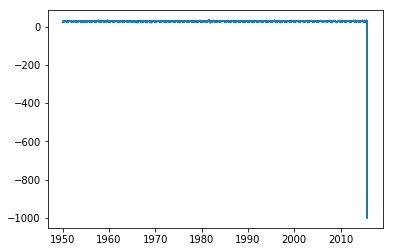

In [23]:
pp.plot(lihue_tmax['date'],lihue_tmax['value'])

In [24]:
def getobs(filename,obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    
    data['value'][data['value'] == -999.9] = np.nan
    
    return data

In [25]:
lihue_tmax = getobs('USW00022536.dly','TMAX')
lihue_tmin = getobs('USW00022536.dly','TMIN')

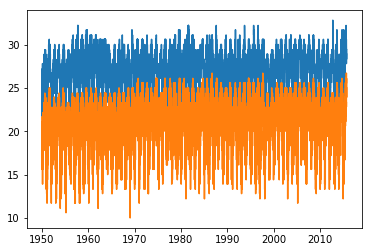

In [26]:
pp.plot(lihue_tmax['date'],lihue_tmax['value'])
pp.plot(lihue_tmin['date'],lihue_tmin['value'])

In [27]:
np.mean(lihue_tmin['value']), np.mean(lihue_tmax['value'])

(nan, nan)

[0, 8, 0, 12]

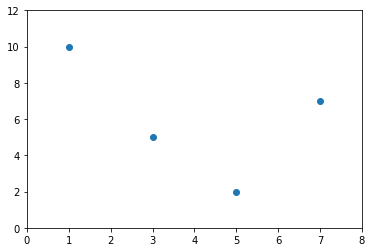

In [28]:
x = np.array([1,3,5,7],'d')
y = np.array([10,5,2,7],'d')

pp.plot(x,y,'o')

pp.axis([0,8,0,12])

In [29]:
xs = np.linspace(1,7)

In [30]:
ys = np.interp(xs,x,y)

[0, 8, 0, 12]

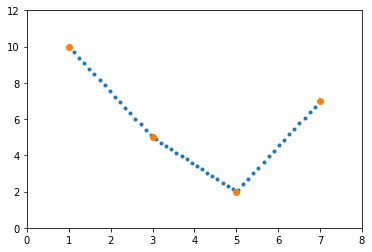

In [31]:
pp.plot(xs,ys,'.')
pp.plot(x,y,'o')

pp.axis([0,8,0,12])

In [32]:
def fillnans(data):
    nan = np.isnan(data['value'])
    
    data['value'][nan] = np.interp(data['date'][nan],data['date'][~nan],data['value'][~nan])

In [34]:
# fillnans(lihue_tmax)

In [33]:
def fillnans(data):
    dates_float = data['date'].astype(np.float64)
    
    nan = np.isnan(data['value'])
    
    data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan])

In [34]:
fillnans(lihue_tmax)
fillnans(lihue_tmin)

In [35]:
np.mean(lihue_tmin['value']), np.mean(lihue_tmax['value'])

(21.051530250594173, 27.300908977192176)

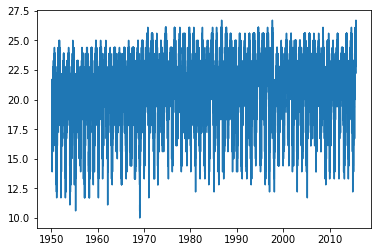

In [36]:
pp.plot(lihue_tmin['date'],lihue_tmin['value'])

In [37]:
def plot_smoothed(t,win=10):
    smoothed = np.correlate(t['value'],np.ones(win)/win,'same')
    
    pp.plot(t['date'],smoothed)

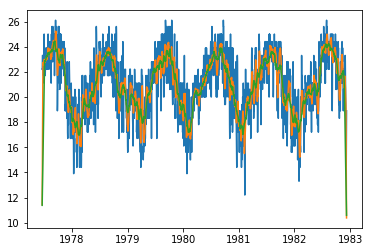

In [38]:
pp.plot(lihue_tmin[10000:12000]['date'],lihue_tmin[10000:12000]['value'])

plot_smoothed(lihue_tmin[10000:12000])
plot_smoothed(lihue_tmin[10000:12000],30)

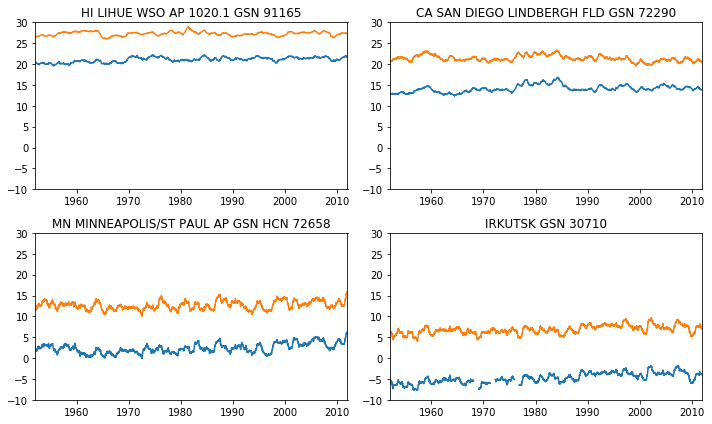

In [40]:
pp.figure(figsize=(10,6))

for i,code in enumerate(datastations):
    pp.subplot(2,2,i+1)
    
    plot_smoothed(getobs('{}.dly'.format(code),'TMIN'),365)
    plot_smoothed(getobs('{}.dly'.format(code),'TMAX'),365)
    
    pp.title(stations[code])
    pp.axis(xmin=np.datetime64('1952'),xmax=np.datetime64('2012'),ymin=-10,ymax=30)

    pp.tight_layout()

In [41]:
def selectyear(data,year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1,'Y')
    
    return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [42]:
selectyear(lihue_tmin,1951)

array([17.8, 17.8, 17.2, 18.3, 20. , 21.7, 22.2, 21.7, 22.2, 22.2, 21.7,
       21.7, 19.4, 18.9, 18.3, 18.3, 19.4, 20.6, 16.7, 14.4, 14.4, 17.2,
       15. , 12.8, 14.4, 13.3, 15. , 14.4, 17.8, 18.3, 16.7, 16.7, 17.2,
       16.7, 17.8, 14.4, 12.2, 13.3, 13.9, 12.8, 14.4, 14.4, 18.9, 19.4,
       20. , 18.3, 18.3, 18.9, 20. , 18.3, 19.4, 13.3, 11.7, 17.8, 17.2,
       17.8, 21.1, 22.2, 20.6, 22.2, 19.4, 20. , 18.3, 17.8, 17.8, 17.2,
       16.1, 18.9, 18.9, 18.9, 17.8, 16.7, 15.6, 13.3, 13.9, 15.6, 15.6,
       21.7, 20.6, 18.3, 15.6, 14.4, 17.2, 17.8, 18.9, 20. , 18.9, 18.3,
       18.3, 20.6, 20. , 18.9, 18.3, 21.1, 16.7, 21.7, 21.1, 21.7, 17.2,
       16.7, 17.8, 18.3, 16.1, 19.4, 20.6, 18.3, 18.3, 17.2, 18.9, 21.7,
       21.7, 21.7, 21.1, 20.6, 20.6, 20. , 21.7, 20. , 20. , 19.4, 18.3,
       21.7, 22.2, 22.8, 20. , 19.4, 17.2, 22.2, 22.8, 22.8, 22.8, 18.9,
       17.8, 18.3, 19.4, 22.8, 22.2, 22.2, 20.6, 21.1, 21.1, 22.8, 19.4,
       19.4, 20.6, 21.7, 23.3, 23.3, 22.2, 22.2, 23

In [43]:
lihue_tmin_all = np.vstack([selectyear(lihue_tmin,year)[:365] for year in range(1951,2014+1)])

In [44]:
lihue_tmin_all

array([[17.8, 17.8, 17.2, ..., 20.6, 19.4, 18.9],
       [17.2, 19.4, 21.7, ..., 21.7, 20.6, 17.8],
       [17.8, 18.3, 19.4, ..., 13.3, 15. , 15. ],
       ...,
       [17.8, 17.2, 17.8, ..., 18.3, 18.9, 19.4],
       [20. , 20. , 19.4, ..., 19.4, 20. , 18.3],
       [17.8, 20. , 17.8, ..., 18.9, 16.1, 14.4]])

In [45]:
lihue_tmin_all.shape

(64, 365)

In [46]:
lihue_tmin_recordmin = np.min(lihue_tmin_all,axis=0)
lihue_tmin_recordmax = np.max(lihue_tmin_all,axis=0)

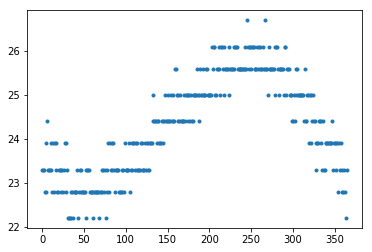

In [47]:
pp.plot(lihue_tmin_recordmax,'.')

In [48]:
lihue_tmax_all = np.vstack([selectyear(lihue_tmax,year)[:365] for year in range(1951,2014+1)])

(-18.25, 365, 8.86, 33.94)

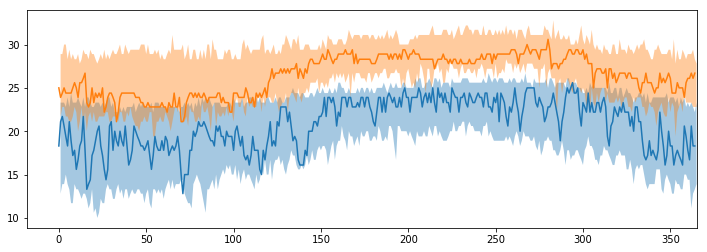

In [49]:
pp.figure(figsize=(12,4))

days = np.arange(1,365+1)

pp.fill_between(days,np.min(lihue_tmin_all,axis=0),np.max(lihue_tmin_all,axis=0),alpha=0.4)
pp.plot(selectyear(lihue_tmin,2009))

pp.fill_between(days,np.min(lihue_tmax_all,axis=0),np.max(lihue_tmax_all,axis=0),alpha=0.4)
pp.plot(selectyear(lihue_tmax,2009))

pp.axis(xmax=365)